<a href="https://colab.research.google.com/github/sidrasultana41/maize__segmentation/blob/main/maizesegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from plantcv import plantcv as pcv

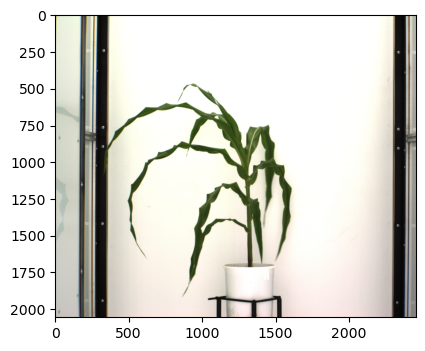

In [ ]:
class options:
    def __init__(self):
        self.image = "./img/maize.png"
        self.debug = "plot"
        self.writeimg= False
        self.outdir = "."
# Get options
args = options()

# Set debug to the global parameter
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv'

img, path, filename = pcv.readimage(filename=args.image)

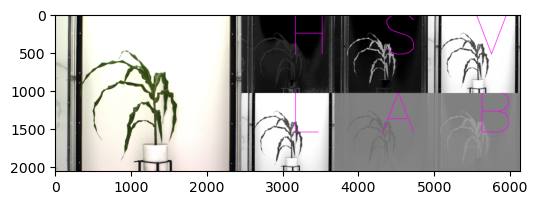

In [ ]:
# Update params related to plotting so we can see better
pcv.params.text_size=50
pcv.params.text_thickness=15

colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

Deprecation Warning:
    plantcv.rotate has moved to plantcv.transform.rotate. 
    plantcv.rotate will be removed in a future version


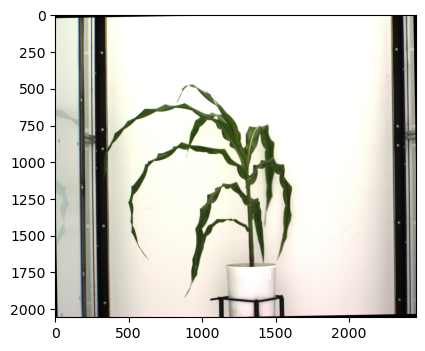

In [ ]:
#now i know the direction this is also preprocessing step...simple rotate function tell degree and crop
rot_img = pcv.rotate(img=img, rotation_deg=1, crop=True)

Deprecation Warning:
    plantcv.rotate has moved to plantcv.transform.rotate. 
    plantcv.rotate will be removed in a future version


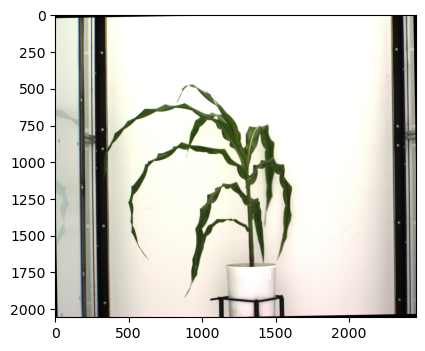

In [ ]:
rot_img = pcv.rotate(img=img, rotation_deg=1, crop=True)

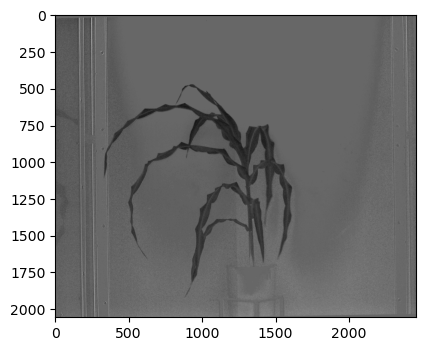

In [ ]:
#### Create a mask and begin to clean it ####
# Change color space for plant extraction
a = pcv.rgb2gray_lab(rgb_img=rot_img, channel="a")

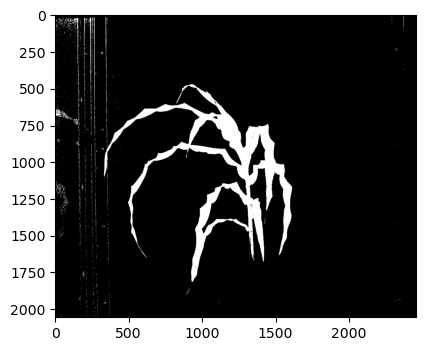

In [ ]:
# Threshold
a_thresh = pcv.threshold.binary(gray_img=a, threshold=120, max_value=255, object_type='dark')


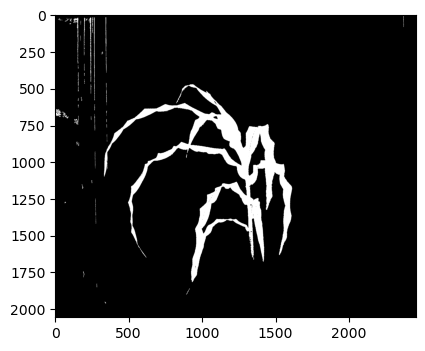

In [ ]:
# Fill in small objects
a_fill_image = pcv.fill(bin_img=a_thresh, size=50)


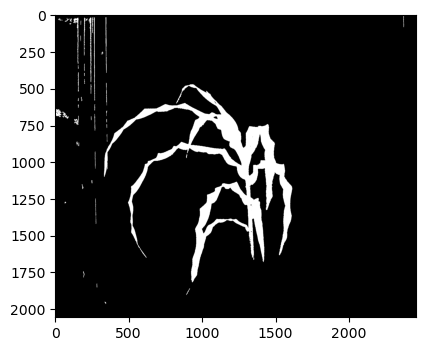

In [ ]:
# Dilate
a_dilated = pcv.dilate(gray_img=a_fill_image, ksize=2, i=1)

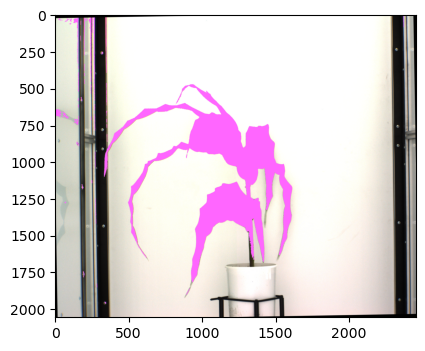

In [ ]:
obj, obj_hierarchy = pcv.find_objects(img=rot_img, mask=a_dilated)

In [ ]:
# Create a grid of ROIs
pcv.params.line_thickness = 10


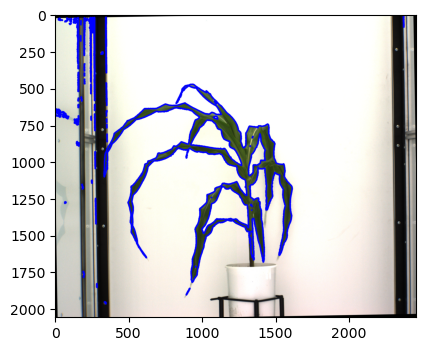

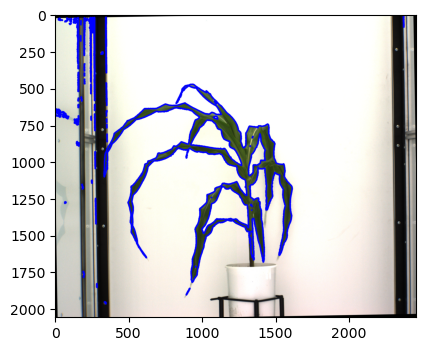

In [ ]:
# Combine objects

# Inputs:
#   img       = RGB or grayscale image data for plotting
#   contours  = Contour list
#   hierarchy = Contour hierarchy array

obj, mask = pcv.object_composition(img=rot_img, contours=obj, hierarchy=obj_hierarchy)

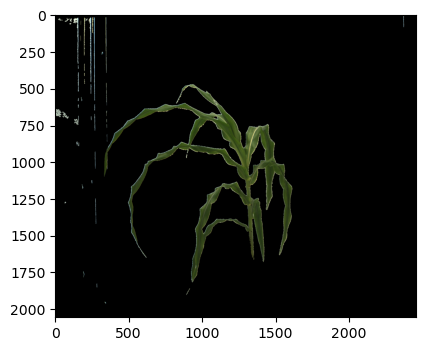

In [ ]:
# Appy mask

# Inputs:
#   img        = RGB or grayscale image data
#   mask       = Binary mask image data
#   mask_color = 'white' or 'black'

masked = pcv.apply_mask(img=rot_img, mask=mask, mask_color="black")

C:\Users\HAIER\anaconda3\envs\plantcv\lib\site-packages\plantcv\plantcv\watershed.py:44: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.


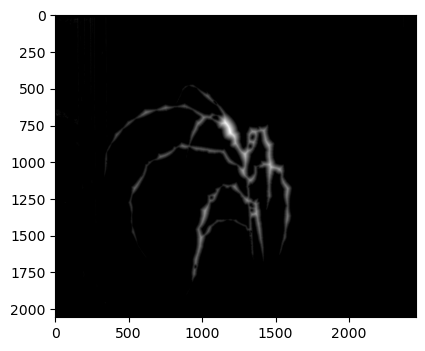

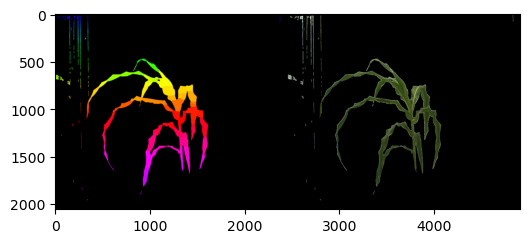

In [ ]:
# Use watershed segmentation

# Inputs:
#   rgb_img  = RGB image data
#   mask     = Binary image, single channel, object in white and background black
#   distance = Minimum distance of local maximum, lower values are more sensitive,
#              and segments more objects (default: 10)
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)


analysis_images = pcv.watershed_segmentation(rgb_img=masked, mask=mask, distance=15, label="default")


In [ ]:
# The save results function will take the measurements stored when running any PlantCV analysis functions, format,
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object,
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file
pcv.outputs.save_results(filename='segmentation_strawberry.txt')